# **Problem Statement**
*Given a set of features, you have to apply logistic regression from scratch to perform binary classification between crack and non-crack. Finally, share the notebook with the outputs of all cells clearly visible.*

# **Evaluation**
*Split the data in this order: 60% train, 20% validation, and 20 % test.Clearly output the F1 score for the training set, validation set, and test set in your COLAB file.*

### Importing required libraries




In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
% matplotlib inline

### Visualizing the datasets by printing its shape, info

In [2]:

df = pd.read_csv('crack_detection.csv', index_col=0)
# To show the created dataframe
df.head()


,mean_r,std_r,kur_r,skew_r,mean_g,std_g,kur_g,skew_g,mean_b,std_b,...,contrast_r,contrast_g,contrast_b,corr_rg,corr_rb,corr_gb,moment_r,moment_g,moment_b,label
0,107.5734,29.267480,0.744029,0.408828,110.2533,26.953218,1.254689,-0.135613,113.5715,25.422051,...,9.181953,177.0,173.0,162.0,0.951368,0.913876,0.803333,856.585412,726.475939,0
1,178.6713,14.917756,3.192406,0.238175,184.4947,14.882156,3.035196,0.141160,190.8538,14.806283,...,9.207314,142.0,136.0,129.0,0.988325,0.989474,0.976787,222.539456,221.478572,0
2,176.6517,34.618255,-0.146336,-0.421552,161.3083,33.688699,0.057178,-0.521476,147.2760,30.809486,...,9.186737,199.0,200.0,194.0,0.968581,0.967398,0.890845,1198.423587,1134.928451,1
3,113.5760,20.084502,0.719752,0.737728,114.0056,19.536222,0.655846,0.729521,113.6179,18.108592,...,9.197973,146.0,142.0,138.0,0.987383,0.983663,0.961305,403.387224,381.663969,0
4,125.3565,29.251595,0.430344,0.833496,129.5277,28.661968,0.475502,0.804161,131.9745,27.475848,...,9.189257,173.0,176.0,177.0,0.980727,0.986702,0.950291,855.655808,821.508433,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 0 to 699
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mean_r      700 non-null    float64
 1   std_r       700 non-null    float64
 2   kur_r       700 non-null    float64
 3   skew_r      700 non-null    float64
 4   mean_g      700 non-null    float64
 5   std_g       700 non-null    float64
 6   kur_g       700 non-null    float64
 7   skew_g      700 non-null    float64
 8   mean_b      700 non-null    float64
 9   std_b       700 non-null    float64
 10  kur_b       700 non-null    float64
 11  skew_b      700 non-null    float64
 12  entropy_r   700 non-null    float64
 13  entropy_g   700 non-null    float64
 14  contrast_r  700 non-null    float64
 15  contrast_g  700 non-null    float64
 16  contrast_b  700 non-null    float64
 17  corr_rg     700 non-null    float64
 18  corr_rb     700 non-null    float64
 19  corr_gb     700 non-null    f

In [4]:
df['label'].value_counts()

0    351
1    349
Name: label, dtype: int64

In [5]:
df.shape

(700, 24)

### divided data sets for training and testing by dropping the label column

In [6]:
# Now we need to train the model by  not considering the 'label' column as its features
# so we will exclude the last column
Y = np.expand_dims(df.label.values,axis=1)
X = df.drop(['label'], axis=1)
# Now its shape would be :
print(Y.shape)  # (700,1)
print(X.shape)  # (700,23)

(700, 1)
(700, 23)


In [7]:
# we will choose to do feature scaling to normalize the  features  before training the model so that, 
# all the sparse numbers / random numbers get converge to between 0 to 1 respective to their column mean
X = (X -np.min(X))/(np.max(X)-np.min(X)).values
# print
X.iloc[0,0:,]


mean_r        0.262726
std_r         0.511197
kur_r         0.051182
skew_r        0.444890
mean_g        0.268342
std_g         0.480634
kur_g         0.060632
skew_g        0.386345
mean_b        0.271580
std_b         0.466476
kur_b         0.066065
skew_b        0.286902
entropy_r     0.689069
entropy_g     0.734019
contrast_r    0.777601
contrast_g    0.610000
contrast_b    0.606796
corr_rg       0.541872
corr_rb       0.824458
corr_gb       0.672665
moment_r      0.730067
moment_g      0.307026
moment_b      0.271725
Name: 0, dtype: float64

## Train_test_split

In [8]:
# we will now spilt the data sets as 60 % being training, 20% validation , 20% testing

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [9]:
# we will now see the shapes of validation , training and testing data sets
print(f"X_train shape : {X_train.shape}")
print(f"X_test shape : {X_test.shape}")
print(f"X_val shape : {X_val.shape}")
print(f"y_train shape : {y_train.shape}")


X_train shape : (420, 23)
X_test shape : (140, 23)
X_val shape : (140, 23)
y_train shape : (420, 1)


## defining functions that will give predicted output

In [10]:
# we will give the y = mx+ b into the sigmoid function which will convert the output squishing between
# 0 and 1.

def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

# This forward function will give the predicted value by the model when it will forward propagate.
def forward(X,W,b):
  y = sigmoid(np.dot(X,W)+b)
  return y

def predict(X,W,b):
  predicted = sigmoid(np.dot(X,W)+b)
  y = np.where(predicted>0.5,1,0)
  return y

# Then, based on our assumptions, we can calculate the loglikelihood of parameters
# using the above two equations and consequently determine the loss function which we have to minimize.
# The following is the Binary Coss-Entropy Loss or the Log Loss function 
# The loss function computes the error for a single training example,
#  while the cost function is the average of the loss functions of the entire training set.
#  we can calculate the loglikelihood of parameters using the above two equations and consequently determine the loss function which we have to minimize.
# The following is the Binary Coss-Entropy Loss or the Log Loss function 

def loss(y,y_hat):
  loss_per_dataset = -np.mean(np.log(y_hat)*y + np.log(1-y_hat)*(1-y))
  return loss_per_dataset


### Implementing Gradient descent function to calculate gradients of weights and biases.


In [11]:
# Implementing Gradient descent function to calculate gradients of weights and biases.

def gradient(X,Y,W,b):
    # X --> Input.
    # y --> true/target value.
    # y_hat --> hypothesis/predictions.
    # w --> weights (parameter).
    # b --> bias (parameter).  
    # m-> number of training examples.
  m = X.shape[0]
  y_hat = np.expand_dims(forward(X,W,b),axis =1)
  # Gradient of loss w.r.t weights.
  dw = ((1/m)*np.dot(X.T, (y_hat - Y))).squeeze()
  # Gradient of loss w.r.t bias.
  db = (1/m)*(np.sum((y_hat - Y)))
  return dw,db



In [12]:
# basically defining a function that will iterate for every epotch
# and predict the output and based upon that, it will compute the loss when compared to actual output
# the gradient descent  

def BinaryClassifier(X,Y,num_iter,learning_rate=0.01):
  m,n = X.shape
  W = np.random.random((n))
  b = np.random.random(1)
  losses = []

  for i in range(num_iter):
    Y_hat = forward(X,W,b)
    losses.append([i,loss(Y,Y_hat)])
    dw,db = gradient(X,Y,W,b)
    W -= learning_rate*dw
    b -= learning_rate*db

  return losses,W,b



In [13]:
l, W, b = BinaryClassifier(X_train,y_train,1000)


In [14]:
losses = np.asarray(l)

In [15]:
losses.shape

(1000, 2)

In [16]:
epochs = losses[:,0]
loss_f = losses[:,1]



### plotting epotchs vs loss for training data set. Ideally for every epotch the  loss should be decrease.

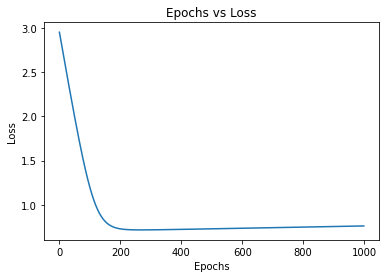

In [17]:
plt.plot(epochs,loss_f)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Epochs vs Loss")
plt.show()

### Calculating f1_score from sklearn for datasets :

* training 
* testing 
* validation


In [18]:
from sklearn.metrics import f1_score

predictions_for_test = predict(X_test,W,b)
predictions_for_train = predict(X_train,W,b)
predictions_for_validation = predict(X_val,W,b)

train_f1_score =f1_score(y_train, predictions_for_train, average='micro')
test_f1_score =f1_score(y_test, predictions_for_test, average='micro')
validation_f1_score =f1_score(y_val, predictions_for_validation, average='micro')

### Printing required f1 scores for respective datasets

In [19]:
print(f"f1 score for training datasets: {train_f1_score}")
print("\n")
print(f"f1 score for testing datasets: {test_f1_score}")
print("\n")
print(f"f1 score for validation datasets: {validation_f1_score}")
print("\n")


f1 score for training datasets: 0.7595238095238096


f1 score for testing datasets: 0.75


f1 score for validation datasets: 0.7


